In [78]:
import numpy as np
import matplotlib.pyplot as pl

%matplotlib inline

In [79]:
import tensorflow as tf
from tensorflow import keras

In [80]:
from tensorflow.keras.preprocessing.image import load_img

In [81]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small


fatal: destination path 'clothing-dataset-small' already exists and is not an empty directory.


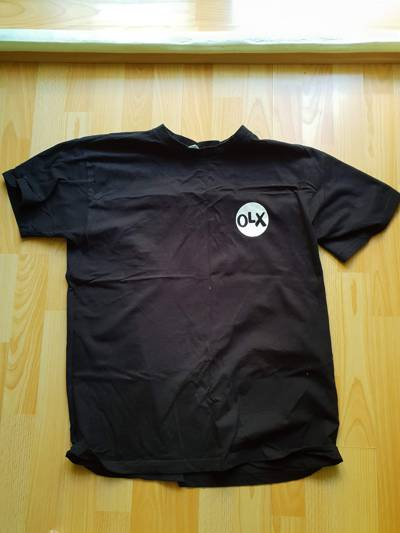

In [82]:
path = './clothing-dataset-small/train/t-shirt/'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
full_Name = f'{path}/{name}'
load_img(full_Name)

- Mostly used for images.
- Higher values in features map => higher similarity


In [83]:
img_tshirt = load_img(full_Name,target_size=(299,299))

In [84]:
img_tshirt = np.array(img_tshirt)

In [85]:
x = img_tshirt

## Pre-trained convolutional neural networks


In [86]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

model = Xception(weights='imagenet',input_shape=(299,299,3))

In [87]:
X = np.array([x])

In [88]:
X.shape

(1, 299, 299, 3)

In [89]:
pred = model.predict(X)

In [90]:
pred.shape

(1, 1000)

In [91]:
decode_predictions(pred)

[[('n03775546', 'mixing_bowl', 0.99503905),
  ('n03942813', 'ping-pong_ball', 0.0049609835),
  ('n04116512', 'rubber_eraser', 6.9301403e-22),
  ('n04380533', 'table_lamp', 3.7470524e-23),
  ('n03445777', 'golf_ball', 1.0299353e-23)]]

## Convolutional Neural Networks


Neural network : Multiple logistic regressions


- Convolutional layers -> vector representation -> dense layers => t_shirt


$$ g(x)= \sigma(X^T w) $$


- There are different weights for shits , t shirts and dresses


## Dense layer


It connects multiple elements from the input to the output


## 8.5 Transfer Learning

- Transfer the learning from a different model to ours.


In [92]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [93]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [94]:
train_gen.flow_from_directory('./clothing-dataset-small/',target_size=(150,150),batch_size=(32,150,150,3)) # images of 150 x 150 - for faster learning, retrain later

Found 3781 images belonging to 4 classes.


<b> Dense vectors : </b> can take vectors of images to make predictions.


<b> Batch </b> : defined as the number of samples that will be passed through the network at one time (also mini-batch )


<b> epoch: </b> one single one pass of all the data through to the network


In [95]:

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150,150),
    batch_size =32)


Found 3068 images belonging to 10 classes.


In [96]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [97]:
X,y = next(train_ds)

In [98]:
X

array([[[[ 0.254902  ,  0.12941182, -0.06666666],
         [ 0.24705887,  0.12156868, -0.0745098 ],
         [ 0.27058828,  0.14509809, -0.05098039],
         ...,
         [ 0.18431377,  0.05882359, -0.1372549 ],
         [ 0.16078436,  0.03529418, -0.1607843 ],
         [ 0.14509809,  0.0196079 , -0.17647058]],

        [[ 0.27058828,  0.14509809, -0.05098039],
         [ 0.2941177 ,  0.1686275 , -0.02745098],
         [ 0.28627455,  0.16078436, -0.03529412],
         ...,
         [ 0.19215691,  0.06666672, -0.12941176],
         [ 0.17647064,  0.05098045, -0.14509803],
         [ 0.16078436,  0.03529418, -0.1607843 ]],

        [[ 0.28627455,  0.16078436, -0.03529412],
         [ 0.30980396,  0.18431377, -0.01176471],
         [ 0.30196083,  0.17647064, -0.01960784],
         ...,
         [ 0.20784318,  0.082353  , -0.11372548],
         [ 0.19215691,  0.06666672, -0.12941176],
         [ 0.17647064,  0.05098045, -0.14509803]],

        ...,

        [[ 0.09019613, -0.08235294, -0

In [99]:
y

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

In [100]:
y[:5] # multiclass classification - 10 different binary variables

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [101]:
# now doing it for validation

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation/',
    target_size=(150,150),
    batch_size =32
)

Found 341 images belonging to 10 classes.


- Custom model -> 10 classes
- base_model -> XCepction


In keras:

- top ➡️ dense layers and prediction

`include_top=False` means not include the dense layers


In [102]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
    )
base_model.trainable= False # dont train CONVOLUTIONAL LAYERS


# Creating a new top 

In [103]:
inputs = keras.Input(shape=(150,150,3)) # this inputs goes to the a base model


base = base_model(inputs) # change to our inputs
# using model as a function
vectors = keras.layers.GlobalAveragePooling2D()(base) #functional style
 
outputs = keras.layers.Dense(10,activation='softmax')(vectors) #

model = keras.Model(inputs,outputs)

In [104]:
preds = model.predict(X)

In [105]:
preds.shape

(32, 10)

- Pooling : take a 3 dimensional object and transform into a simple 1 dimensional array 

In [106]:
preds[0]

array([0.07818814, 0.34401304, 0.07786223, 0.07629173, 0.08497416,
       0.02738598, 0.03412164, 0.1006496 , 0.09461966, 0.08189382],
      dtype=float32)

## Adam

In [107]:
#optimizing the weights

learning_Rate =0.01 
optimizer = keras.optimizers.Adam(learning_rate=learning_Rate)


#multiclass classification problem
loss = keras.losses.CategoricalCrossentropy(from_logits=True)

In [108]:
# we will compile the model now:

model.compile(optimizer=optimizer,loss=loss,metrics=[
'accuracy'
])



- Epoch : do a iteration over the dataset once

In [109]:
history = model.fit(train_ds,epochs=10,validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 7s 57ms/step - loss: 1.2597 - accuracy: 0.6568 - val_loss: 0.9682 - val_accuracy: 0.7449
Epoch 2/10
96/96 [==============================] - 5s 52ms/step - loss: 0.5580 - accuracy: 0.8204 - val_loss: 0.8926 - val_accuracy: 0.7889
Epoch 3/10
96/96 [==============================] - 5s 51ms/step - loss: 0.3202 - accuracy: 0.8931 - val_loss: 0.8956 - val_accuracy: 0.7595
Epoch 4/10
96/96 [==============================] - 5s 52ms/step - loss: 0.2358 - accuracy: 0.9205 - val_loss: 0.9401 - val_accuracy: 0.7566
Epoch 5/10
96/96 [==============================] - 5s 52ms/step - loss: 0.1991 - accuracy: 0.9329 - val_loss: 0.8691 - val_accuracy: 0.8182
Epoch 6/10
96/96 [==============================] - 5s 52ms/step - loss: 0.1413 - accuracy: 0.9478 - val_loss: 0.9918 - val_accuracy: 0.7801
Epoch 7/10
96/96 [==============================] - 5s 51ms/step - loss: 0.0741 - accuracy: 0.9762 - val_loss: 0.8249 - val_accuracy: 0.8006
Epoch 8/10
96

In [110]:
from matplotlib import pyplot as plt

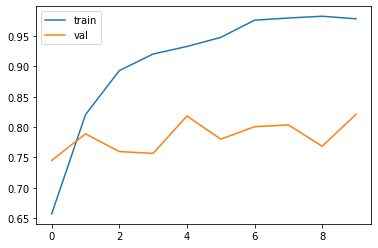

In [112]:
# plotting the values of train and validation




plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'],label='val')

plt.legend()

The model is clearly overfitting and the difference between the validation and train dataset is quite high.

## learning_rate 
 finding the balance between learning not too fast and not too slow.

In [113]:
def make_model(alpha=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150,150,3)
        )
    base_model.trainable= False # dont train CONVOLUTIONAL LAYERS

    inputs = keras.Input(shape=(150,150,3)) # this inputs goes to the a base model


    base = base_model(inputs) # change to our inputs
    # using model as a function
    vectors = keras.layers.GlobalAveragePooling2D()(base) #functional style
    
    outputs = keras.layers.Dense(10,activation='softmax')(vectors) #

    model = keras.Model(inputs,outputs)
    #optimizing the weights

    optimizer = keras.optimizers.Adam(learning_rate=alpha)


    #multiclass classification problem
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    # we will compile the model now:

    model.compile(optimizer=optimizer,
    loss=loss,
    metrics=[
    'accuracy'
    ])

    return model

In [114]:
scores = {}

for lr in [0.0001,0.001,0.01,0.1]:
    print(lr)
    model = make_model(alpha=lr)

    history = model.fit(train_ds,epochs=10,validation_data=val_ds)
    scores[lr]=history. history
    print()
    print()

0.0001
Epoch 1/10


/home/elegant00/.local/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


96/96 [==============================] - 7s 57ms/step - loss: 1.9982 - accuracy: 0.3220 - val_loss: 1.6119 - val_accuracy: 0.4897
Epoch 2/10
96/96 [==============================] - 5s 52ms/step - loss: 1.4125 - accuracy: 0.5603 - val_loss: 1.2380 - val_accuracy: 0.5924
Epoch 3/10
96/96 [==============================] - 5s 52ms/step - loss: 1.1528 - accuracy: 0.6346 - val_loss: 1.0506 - val_accuracy: 0.6891
Epoch 4/10
96/96 [==============================] - 5s 52ms/step - loss: 1.0083 - accuracy: 0.6796 - val_loss: 0.9410 - val_accuracy: 0.7361
Epoch 5/10
96/96 [==============================] - 5s 52ms/step - loss: 0.9113 - accuracy: 0.7076 - val_loss: 0.8629 - val_accuracy: 0.7625
Epoch 6/10
96/96 [==============================] - 5s 52ms/step - loss: 0.8431 - accuracy: 0.7295 - val_loss: 0.8127 - val_accuracy: 0.7683
Epoch 7/10
96/96 [==============================] - 5s 52ms/step - loss: 0.7894 - accuracy: 0.7454 - val_loss: 0.7701 - val_accuracy: 0.7830
Epoch 8/10
96/96 [======

In [ ]:
# we will compile the model now:

model.compile(optimizer=optimizer,loss=loss,metrics=[
'accuracy'
])



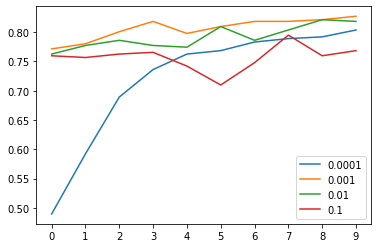

In [ ]:
for lr,hist in scores.items():
    plt.plot(hist['val_accuracy'],label=lr)

plt.xticks(np.arange(10))

plt.legend()

0.00001 learning rate is quite slow ,  and 0.1 has quite a low score

In [121]:
del scores[0.1]


KeyError: 0.1

In [129]:
del scores[0.0001]

KeyError: 0.0001

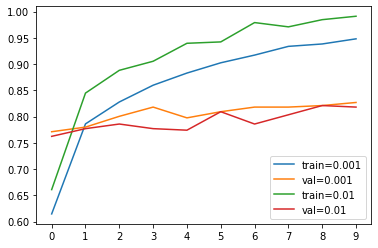

In [138]:
for lr,hist in scores.items():
    plt.plot(hist['accuracy'],label=('train=%s'%lr))
    plt.plot(hist['val_accuracy'],label=('val=%s'% lr))

plt.xticks(np.arange(10))

plt.legend()

best `lr` =0.001

## Checkpointing

The way checkpoint works , let's say , for 10 epochs , at the end of each epoch we evaluate our model with val dataset, after one epoch is over , we can do "callbacks".

- Callbacks: are special utilities or functions that are executed during training at given stage of the training procedure.


In [131]:
model.save_weights('model_v1.h5',save_format='h5')

In [139]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'Xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'


    #format(epoch = 12, val_accuracy=0.84)
    )

In [142]:
alpha= 0.001

model = make_model(alpha=alpha)

history= model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Epoch 1/10


/home/elegant00/.local/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


95/96 [============================>.] - ETA: 0s - loss: 1.0941 - accuracy: 0.6327

/home/elegant00/.local/lib/python3.9/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


96/96 [==============================] - 7s 61ms/step - loss: 1.0891 - accuracy: 0.6349 - val_loss: 0.7224 - val_accuracy: 0.7830
Epoch 2/10
96/96 [==============================] - 5s 55ms/step - loss: 0.6252 - accuracy: 0.7914 - val_loss: 0.6512 - val_accuracy: 0.8035
Epoch 3/10
96/96 [==============================] - 5s 52ms/step - loss: 0.5051 - accuracy: 0.8315 - val_loss: 0.6063 - val_accuracy: 0.8035
Epoch 4/10
96/96 [==============================] - 5s 55ms/step - loss: 0.4271 - accuracy: 0.8615 - val_loss: 0.5792 - val_accuracy: 0.8270
Epoch 5/10
96/96 [==============================] - 5s 52ms/step - loss: 0.3745 - accuracy: 0.8833 - val_loss: 0.5813 - val_accuracy: 0.7947
Epoch 6/10
96/96 [==============================] - 5s 52ms/step - loss: 0.3243 - accuracy: 0.9091 - val_loss: 0.5712 - val_accuracy: 0.8211
Epoch 7/10
96/96 [==============================] - 5s 52ms/step - loss: 0.2884 - accuracy: 0.9237 - val_loss: 0.5538 - val_accuracy: 0.8182
Epoch 8/10
96/96 [======

In this case the best epoch was 9/10 - val_accuracy = 0.8387

We will only save the best accuracy for a given epoch (`save_best_only`)

## 8.8 Adding more layers

- Adding more layers can help improving the performance of the model

Experimenting with different ammount of  dense layers :


In [166]:
def make_model(alpha=0.01,size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150,150,3)
        )
    base_model.trainable= False # dont train CONVOLUTIONAL LAYERS


    ################

    inputs = keras.Input(shape=(150,150,3)) # this inputs goes to the a base model    
    base = base_model(inputs,training=False) # change to our inputs
    
    
    # using model as a function
    vectors = keras.layers.GlobalAveragePooling2D()(base) #functional style
    inner = keras.layers.Dense(10)(size_inner,activation='relu')(vectors) 
    outputs = keras.layers.Dense(10)(inner) #


    model = keras.Model(inputs,outputs)
    #optimizing the weights
    optimizer = keras.optimizers.Adam(learning_rate=alpha)



    #multiclass classification problem
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    # we will compile the model now:

    model.compile(optimizer=optimizer,
    loss=loss,
    metrics=[
    'accuracy'
    ])

    return model

In [ ]:
# we will compile the model now:

model.compile(optimizer=optimizer,loss=loss,metrics=[
'accuracy'
])



## Activation Functions:


For Outputs:

- Sigmoid.
- Softmax

Intermediate:
-ReLU


### ReLU activation function:

$$ f(x) = max(0,x) $$


<p align="center">

  <img src="https://i.imgur.com/gKA4kA9.jpg" />
</p>

In [175]:
scores = {}

alpha= 0.001

for size in [10,100,1000]:
    print(size)
    model = make_model(alpha=lr,size_inner=size)

    history = model.fit(train_ds,epochs=10,validation_data=val_ds)
    scores[size]=history. history
    print()
    print()

10
Epoch 1/10
96/96 [==============================] - 7s 57ms/step - loss: 1.3850 - accuracy: 0.5456 - val_loss: 1.0534 - val_accuracy: 0.6305
Epoch 2/10
96/96 [==============================] - 5s 52ms/step - loss: 0.9444 - accuracy: 0.6675 - val_loss: 0.8220 - val_accuracy: 0.7273
Epoch 3/10
96/96 [==============================] - 5s 51ms/step - loss: 0.7598 - accuracy: 0.7239 - val_loss: 0.8001 - val_accuracy: 0.7390
Epoch 4/10
96/96 [==============================] - 5s 51ms/step - loss: 0.6619 - accuracy: 0.7608 - val_loss: 0.7925 - val_accuracy: 0.7507
Epoch 5/10
96/96 [==============================] - 5s 51ms/step - loss: 0.5931 - accuracy: 0.7764 - val_loss: 0.8112 - val_accuracy: 0.7185
Epoch 6/10
96/96 [==============================] - 5s 51ms/step - loss: 0.5800 - accuracy: 0.7930 - val_loss: 0.8255 - val_accuracy: 0.7361
Epoch 7/10
96/96 [==============================] - 5s 52ms/step - loss: 0.4598 - accuracy: 0.8318 - val_loss: 0.8507 - val_accuracy: 0.7361
Epoch 8/10

<b> GTX 1080 Time</b>  : 2m 40 s

In [176]:
#TODO: Time comparison between GPU/CPU 

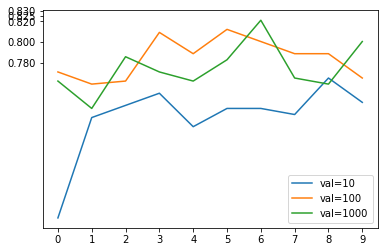

In [177]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

Pick : val=100

## Dropout & Regularization 

- When the NN sees a logo , it may recognize the pattern and generalize 

We want the model to focus on overall shape and not on specific details like logos.

Dropout: Idea - What if we could randomly hide a part of the image ? 

- Drop rate : how much of the NN we will freeze ?

### Model_v3



In [183]:
def make_model(alpha=0.01,size_inner=100,droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150,150,3)
        )
    base_model.trainable= False # dont train CONVOLUTIONAL LAYERS


    ################

    inputs = keras.Input(shape=(150,150,3)) # this inputs goes to the a base model    
    base = base_model(inputs,training=False) # change to our inputs
    
    
    # using model as a function
    vectors = keras.layers.GlobalAveragePooling2D()(base) #functional style
    
    inner = keras.layers.Dense(size_inner,activation='relu')(vectors) 


    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(10)(drop) #


    model = keras.Model(inputs,outputs)
    #optimizing the weights
    optimizer = keras.optimizers.Adam(learning_rate=alpha)



    #multiclass classification problem
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    # we will compile the model now:

    model.compile(optimizer=optimizer,
    loss=loss,
    metrics=[
    'accuracy'
    ])

    return model

In [186]:
scores = {}

alpha= 0.001
size = 100 # ammount of dense layers


for droprate in [0.0,0.2,0.5,0.8]:
    print('Selected droprate %s' %droprate)
    model = make_model(
        alpha=lr,
        size_inner=size,
        droprate=droprate
        
        )

    history = model.fit(train_ds,epochs=30,validation_data=val_ds)
    # more epochs

    scores[droprate]=history. history
    print()
    print()

Selected droprate 0.0
Epoch 1/30
96/96 [==============================] - 7s 57ms/step - loss: 1.1493 - accuracy: 0.6486 - val_loss: 0.8687 - val_accuracy: 0.7097
Epoch 2/30
96/96 [==============================] - 5s 52ms/step - loss: 0.5824 - accuracy: 0.7953 - val_loss: 0.7818 - val_accuracy: 0.7390
Epoch 3/30
96/96 [==============================] - 5s 52ms/step - loss: 0.4568 - accuracy: 0.8377 - val_loss: 0.8103 - val_accuracy: 0.7214
Epoch 4/30
96/96 [==============================] - 5s 52ms/step - loss: 0.3459 - accuracy: 0.8794 - val_loss: 0.7856 - val_accuracy: 0.7771
Epoch 5/30
96/96 [==============================] - 5s 52ms/step - loss: 0.2431 - accuracy: 0.9113 - val_loss: 0.7343 - val_accuracy: 0.7830
Epoch 6/30
96/96 [==============================] - 5s 52ms/step - loss: 0.1622 - accuracy: 0.9404 - val_loss: 0.8764 - val_accuracy: 0.8006
Epoch 7/30
96/96 [==============================] - 5s 52ms/step - loss: 0.1900 - accuracy: 0.9358 - val_loss: 0.8970 - val_accuracy

Time taken : 10 minutes aprroximately

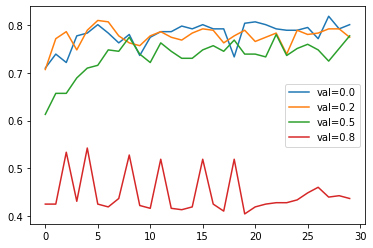

In [189]:
for droprate,hist in scores.items():
    plt.plot(hist['val_accuracy'],label=('val=%s'%droprate))

plt.legend()

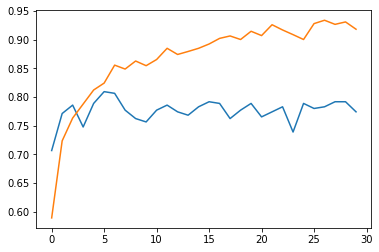

In [194]:
hist = scores[0.2]
plt.plot(hist['val_accuracy'],label=('val=%s'%droprate))
plt.plot(hist['accuracy'],label=('val=%s'%droprate))


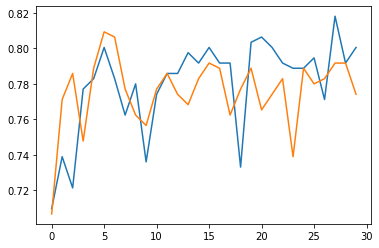

In [195]:
hist = scores[0]
plt.plot(hist['val_accuracy'],label=('val=%s'%droprate))

hist = scores[0.2]
plt.plot(hist['val_accuracy'],label=('val=%s'%droprate))


Parameter chosen: 0.5 

## Data Augmentation

The performance of deep learning neural networks often improves with the amount of data available.

Data augmentation is a technique to artificially create new training data from existing training data. This is done by applying domain-specific techniques to examples from the training data that create new and different training examples.



- Generate more images for existing ones. (Flipping the image)

In [202]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image


In [198]:
def apply_transform(x, transform_parameters):
    x = tf.keras.preprocessing.image.apply_affine_transform(x,
        transform_parameters.get('theta', 0),
        transform_parameters.get('tx', 0),
        transform_parameters.get('ty', 0),
        transform_parameters.get('shear', 0),
        transform_parameters.get('zx', 1),
        transform_parameters.get('zy', 1),
        row_axis=0,
        col_axis=1,
        channel_axis=2,
        fill_mode='nearest',
        cval=0.0,
        order=1
    )

    if transform_parameters.get('flip_horizontal', False):
        x = x[::-1, :, :]

    if transform_parameters.get('flip_vertical', False):
        x = x[:, ::-1, :]

    return x


In [199]:
def augment(img, 
            rotation=0,
            height_shift=0,
            width_shift=0,
            shear=0,
            zoom_x=1,
            zoom_y=1,
            flip_horizontal=0,
            flip_vertical=0):

    x = np.array(img)

    transform_parameters = {
        'theta': rotation,
        'tx': height_shift,
        'ty': width_shift,
        'shear': shear,
        'zx': zoom_x,
        'zy': zoom_y,
        'flip_horizontal': flip_horizontal,
        'flip_vertical': flip_vertical,
    }
    
    xaug = apply_transform(x, transform_parameters)
    imgaug = Image.fromarray(xaug)
    return imgaug

In [200]:
def show_augmentations(param, values, figsize=(20, 6)):
    imgs = []

    for v in values:
        im = augment(tshirt, **{param: v})
        imgs.append(im)

    plt.figure(figsize=figsize)

    n = len(values)

    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(np.array(imgs[i]))
        plt.title('%s=%s' % (param, values[i]))
        plt.axis("off")

    plt.show()    


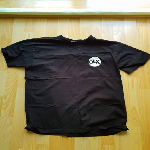

In [203]:
tshirt = Image.open('./clothing-dataset-small/train/t-shirt/5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg')
tshirt = tshirt.resize((150, 150), resample=Image.NEAREST)
tshirt


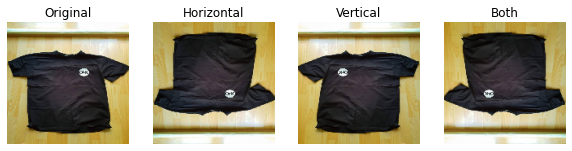

In [204]:
plt.figure(figsize=(10, 3))

plt.subplot(1, 4, 1)
plt.imshow(np.array(tshirt))
plt.title('Original')
plt.axis("off")


plt.subplot(1, 4, 2)

img = augment(tshirt, flip_horizontal=1)
plt.imshow(np.array(img))
plt.title('Horizontal')
plt.axis("off")


plt.subplot(1, 4, 3)

img = augment(tshirt, flip_vertical=1)
plt.imshow(np.array(img))
plt.title('Vertical')
plt.axis("off")


plt.subplot(1, 4, 4)

img = augment(tshirt, flip_horizontal=1, flip_vertical=1)
plt.imshow(np.array(img))
plt.title('Both')
plt.axis("off")

plt.show() 


## Shift : 
Rotate with a transformation ,between horizontal and vertical axis.

- Height shift: moving it along the y dimension

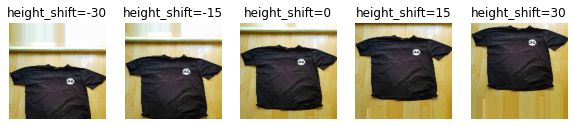

In [205]:
param = 'height_shift'
values = [-30, -15, 0, 15, 30]
show_augmentations(param, values, (10, 3))


- Shear : shrink the image  vs Rotation
- Zoom IN/OUT

--- Note: Use your own judgement for choosing augments
- Tune it as a hyperparameter
- LOOK at the dataset (What kind of variations are there ?)


In [208]:
# We will only change training in this case ( a customer will obiously not upload a keras transformed image)

train_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    shear_range=10.0,
    zoom_range=0.1,
    vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train/',
    target_size=(150,150),
    batch_size=32,
    shuffle=False

)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)


Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [209]:
alpha = 0.001
size = 100
droprate = 0.2

model = make_model(
    alpha=alpha,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
96/96 [==============================] - 16s 146ms/step - loss: 2.0662 - accuracy: 0.3719 - val_loss: 1.5982 - val_accuracy: 0.4076
Epoch 2/50
96/96 [==============================] - 14s 142ms/step - loss: 1.5454 - accuracy: 0.4775 - val_loss: 1.2014 - val_accuracy: 0.5572
Epoch 3/50
96/96 [==============================] - 14s 143ms/step - loss: 1.3403 - accuracy: 0.5411 - val_loss: 1.2168 - val_accuracy: 0.5543
Epoch 4/50
96/96 [==============================] - 14s 145ms/step - loss: 1.2194 - accuracy: 0.5782 - val_loss: 0.9945 - val_accuracy: 0.6510
Epoch 5/50
96/96 [==============================] - 14s 148ms/step - loss: 1.0917 - accuracy: 0.6268 - val_loss: 0.8592 - val_accuracy: 0.7273
Epoch 6/50
96/96 [==============================] - 14s 140ms/step - loss: 1.0674 - accuracy: 0.6375 - val_loss: 0.8070 - val_accuracy: 0.7302
Epoch 7/50
96/96 [==============================] - 14s 141ms/step - loss: 1.0283 - accuracy: 0.6411 - val_loss: 0.7889 - val_accuracy: 0.7390

CPU ➡️ Generates Augmentations

GPU ➡️ Fit the Model.

In [210]:
# TODO: Better performance with Tensorflow API. 

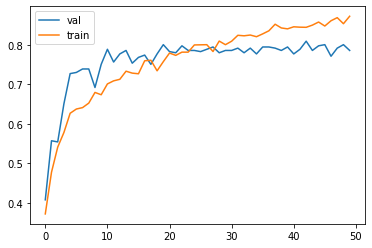

In [211]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()


## Training a larger 299x299 model:

In [228]:
def make_model(input_size=150,alpha=0.01,size_inner=100,droprate=0.5):
    
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size,input_size,3),
        )
    base_model.trainable= False # dont train CONVOLUTIONAL LAYERS


    ################

    inputs = keras.Input(shape=(input_size,input_size,3)) # this inputs goes to the a base model    
    base = base_model(inputs,training=False) # change to our inputs
    
    
    # using model as a function
    vectors = keras.layers.GlobalAveragePooling2D()(base) #functional style
    
    inner = keras.layers.Dense(size_inner,activation='relu')(vectors) 


    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(10)(drop) #


    model = keras.Model(inputs,outputs)
    #optimizing the weights
    optimizer = keras.optimizers.Adam(learning_rate=alpha)



    #multiclass classification problem
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    # we will compile the model now:

    model.compile(optimizer=optimizer,
    loss=loss,
    metrics=[
    'accuracy'
    ])

    return model

In [213]:
input_size = 299


In [226]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)


Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [231]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'Xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'


    #format(epoch = 12, val_accuracy=0.84)
    )

In [232]:
alpha=0.0005 
size=100
droprate=0.2


model=make_model(
    input_size=299,
    alpha=alpha,
    size_inner=size,
    droprate=droprate,
)

history= model.fit(
    train_ds,epochs=50,
    validation_data=val_ds,
    callbacks=[checkpoint])

Epoch 1/50
96/96 [==============================] - 50s 501ms/step - loss: 1.0011 - accuracy: 0.6871 - val_loss: 0.5669 - val_accuracy: 0.8182
Epoch 2/50
96/96 [==============================] - 48s 493ms/step - loss: 0.5171 - accuracy: 0.8256 - val_loss: 0.4574 - val_accuracy: 0.8534
Epoch 3/50
96/96 [==============================] - 48s 497ms/step - loss: 0.4354 - accuracy: 0.8445 - val_loss: 0.4174 - val_accuracy: 0.8622
Epoch 4/50
96/96 [==============================] - 47s 491ms/step - loss: 0.3910 - accuracy: 0.8657 - val_loss: 0.3946 - val_accuracy: 0.8622
Epoch 5/50
96/96 [==============================] - 48s 495ms/step - loss: 0.3444 - accuracy: 0.8833 - val_loss: 0.3748 - val_accuracy: 0.8798
Epoch 6/50
96/96 [==============================] - 47s 489ms/step - loss: 0.3180 - accuracy: 0.8931 - val_loss: 0.3705 - val_accuracy: 0.8651
Epoch 7/50
96/96 [==============================] - 47s 491ms/step - loss: 0.2930 - accuracy: 0.8999 - val_loss: 0.3917 - val_accuracy: 0.8592

## Using the model

In [243]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [269]:
model = keras.models.load_model('Xception_v4_1_21_0.906.h5')

In [270]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds= test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299,299),
    batch_size=32,
    shuffle=False,
)

Found 372 images belonging to 10 classes.


In [271]:
model.evaluate(test_ds)

12/12 [==============================] - 3s 161ms/step - loss: 0.2899 - accuracy: 0.8952


[0.289867103099823, 0.8951612710952759]

Second number ➡️ represents accuracy.

In [289]:
path= 'clothing-dataset-small/test/longsleeve/0f4d9494-612a-48f8-be05-e47f4fc54d54.jpg'




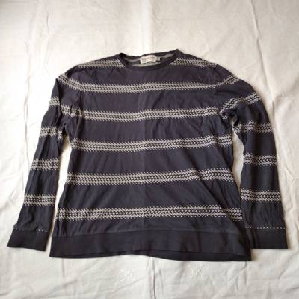

In [290]:
img_test = load_img(path,target_size=(299,299))
img_test

In [291]:
import numpy as np
x = np.array(img_test)

In [292]:
X = np.array([x])

X.shape

(1, 299, 299, 3)

In [293]:
X = preprocess_input(X)

In [294]:
pred = model.predict(X)

In [296]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]


In [297]:
dict(zip(classes, pred[0]))


{'dress': -0.2795212,
 'hat': -4.6974382,
 'longsleeve': 4.9123197,
 'outwear': 2.0405924,
 'pants': -1.7435058,
 'shirt': 0.588761,
 'shoes': -8.206358,
 'shorts': -3.0857327,
 'skirt': -0.47327194,
 't-shirt': -0.6603512}